In [17]:
# Imports


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.applications import MobileNetV2

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

## Exercise 1:  Training Deep Neural Network on MNIST

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3394 - loss: 1.9490 - val_accuracy: 0.7400 - val_loss: 1.0112
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8139 - loss: 0.7518 - val_accuracy: 0.8150 - val_loss: 0.6876
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8845 - loss: 0.4431 - val_accuracy: 0.8250 - val_loss: 0.6268
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9235 - loss: 0.3046 - val_accuracy: 0.8350 - val_loss: 0.6218
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9528 - loss: 0.2178 - val_accuracy: 0.8450 - val_loss: 0.6315
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9722 - loss: 0.1576 - val_accuracy: 0.8300 - val_loss: 0.6545
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9759 - loss: 0.1148 - val_accuracy: 0.8300 - val_loss: 0.6985
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9855 - loss: 0.0837 - val_accuracy: 0.8200 - val_loss

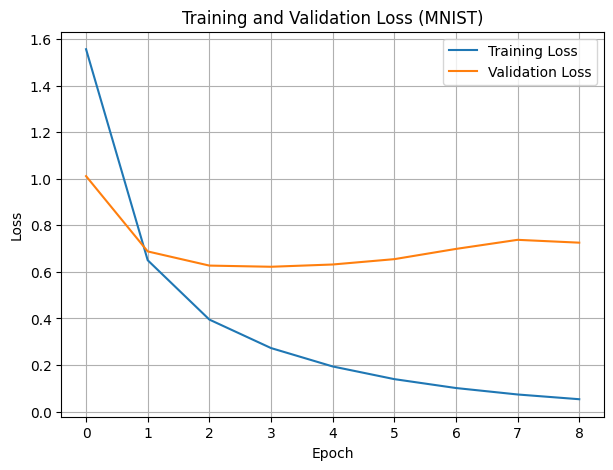

In [12]:
# Exercise 1

# Loading and preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Use only the first 1000 training and 200 test samples
x_train, y_train = x_train[:1000], y_train[:1000]
x_test, y_test = x_test[:200], y_test[:200]

# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 -> 784)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Building the neurlal network
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])

# Compiling tthe model
optimizer = optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluating the model and plotting
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (MNIST)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Q1.1

The obtained test accuracy was 88 %.

This is a solid result considering the network was trained on only 1 000 images.
It shows that the model learned to recognize digit patterns quite well even with limited data, though the validation loss curve suggests a bit of overfitting after a few epochs.

## Exercise 2 Deep neural network on CIFAR-10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.1273 - loss: 4.4314 - val_accuracy: 0.1890 - val_loss: 2.1669
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2423 - loss: 2.0740 - val_accuracy: 0.2520 - val_loss: 2.0223
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2989 - loss: 1.9440 - val_accuracy: 0.2880 - val_loss: 1.9696
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3465 - loss: 1.8557 - val_accuracy: 0.2950 - val_loss: 1.9771
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3628 - loss: 1.8042 - val_accuracy: 0.3030 - val_loss: 1.9415
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3778 - loss: 1.7525 - val_accuracy: 0.3270 - val_loss: 1.9062
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3907 - loss: 1.6995 - val_accuracy: 0.3320 - val_loss: 1.8804
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.

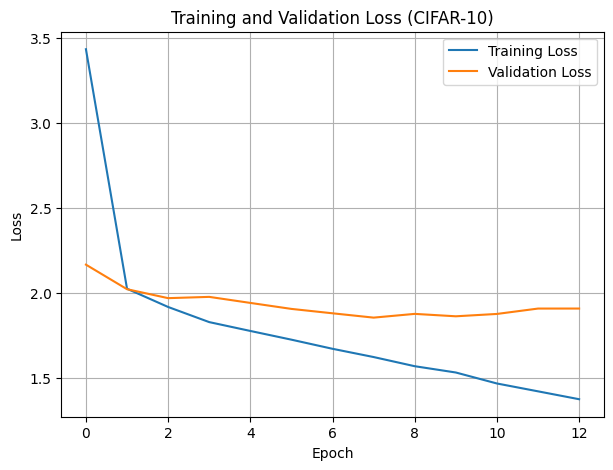

In [14]:
# Exercise 2 DNN on CIFAR-10

# Loading and preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Use only the first 5000 training and 1000 test samples
x_train, y_train = x_train[:5000], y_train[:5000]
x_test, y_test = x_test[:1000], y_test[:1000]

# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (32x32x3 -> 3072)
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

# Building the model
model = models.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='elu', kernel_initializer='he_normal'),
    layers.Dense(10, activation='softmax')
])

# Compiling
optimizer = optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

# Evaluating and plotting
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (CIFAR-10)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Q2.1

The model achieved a test accuracy of 34.8 % on the CIFAR-10 test set.

This is noticeably lower than for MNIST, which makes sense since CIFAR-10 is a much more complex dataset with color images and more visual variation.
A dense network without convolutional layers isn’t ideal for image data like this, so the result is reasonable and expected.

## Exercise 3 Regularization with Alpha Dropout and MC Dropout

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.1434 - loss: 2.5314 - val_accuracy: 0.7500 - val_loss: 1.0247
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5083 - loss: 1.4798 - val_accuracy: 0.8000 - val_loss: 0.6914
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6440 - loss: 1.0065 - val_accuracy: 0.8150 - val_loss: 0.6132
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7203 - loss: 0.7950 - val_accuracy: 0.8300 - val_loss: 0.5779
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7632 - loss: 0.6706 - val_accuracy: 0.8450 - val_loss: 0.5660
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8180 - loss: 0.5861 - val_accuracy: 0.8450 - val_loss: 0.5714
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8466 - loss: 0.4871 - val_accuracy: 0.8550 - val_loss: 0.5735
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8557 - loss: 0.4424 - val_accuracy: 0.8300 - val_loss

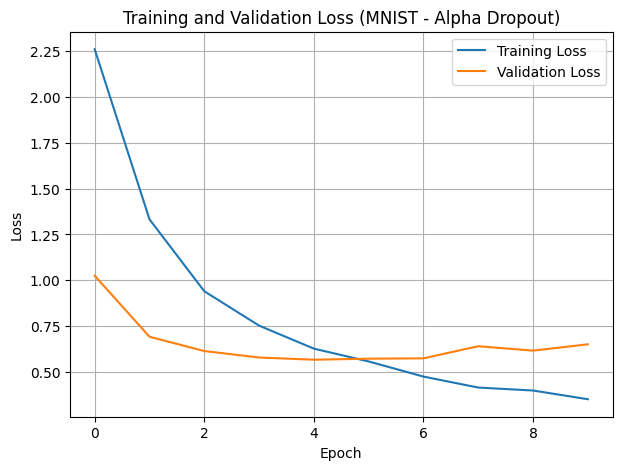

In [15]:
# Exercise 3

# Loading and preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, y_train = x_train[:1000], y_train[:1000]
x_test, y_test = x_test[:200], y_test[:200]

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))

# Building network with Alpha dropoit + SELU
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.1),
    layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.1),
    layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.1),
    layers.Dense(10, activation='softmax')
])

# Compiling
optimizer = optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Training
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluating on normal interference
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nQ3.1 Test Accuracy (Alpha Dropout): {test_acc * 100:.2f}%")

# Monte Carlo dropout interference
def mc_dropout_predictions(model, x, num_samples=20):
    preds = []
    for _ in range(num_samples):
        # training=True keeps dropout active
        y_pred = model(x, training=True)
        preds.append(y_pred.numpy())
    preds = np.stack(preds, axis=0)
    mean_preds = preds.mean(axis=0)
    return mean_preds

# MC Dropout: 20 stochastic forward passes
y_pred_mc = mc_dropout_predictions(model, x_test, num_samples=20)
y_pred_labels = np.argmax(y_pred_mc, axis=1)

# Accuracy
mc_acc = np.mean(y_pred_labels == y_test)
print(f"Q3.2 MC Dropout-enhanced Test Accuracy: {mc_acc * 100:.2f}%")

# Plotting
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (MNIST - Alpha Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Q3.1-2

The model trained with Alpha Dropout reached a test accuracy of 86 %.

This shows that the combination of SELU activations, LeCun initialization, and Alpha Dropout helped the network train in a stable way and generalize fairly well.

When applying Monte Carlo Dropout during inference, the averaged accuracy slightly decreased to 85 %.
This small drop suggests that the model’s predictions became more stable and less overconfident.
Overall, Alpha Dropout provided effective regularization, and MC Dropout introduced uncertainty estimation without significantly degrading accuracy.

## Exercise 4 Pre-trained CNN

/tmp/ipython-input-2019740790.py:15: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False,


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.1363 - loss: 2.2867 - val_accuracy: 0.2550 - val_loss: 2.2162
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2510 - loss: 2.1721 - val_accuracy: 0.2850 - val_loss: 2.1238
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2773 - loss: 2.0708 - val_accuracy: 0.2625 - val_loss: 2.0589
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3047 - loss: 1.9953 - val_accuracy: 0.2750 - val_loss: 2.0198
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3111 - loss: 1.9438 - val_accuracy: 0.2775 - val_loss: 1.9970

Q4.1 Test Accuracy (Transfer Learning - MobileNetV2): 26.20%


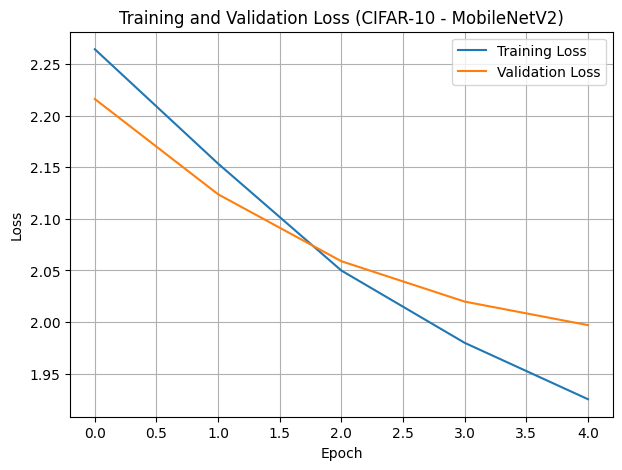

In [20]:
# Exercise 4

# Loading and preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Use subset
x_train, y_train = x_train[:2000], y_train[:2000]
x_test, y_test = x_test[:500], y_test[:500]

# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Load the base model
base_model = MobileNetV2(include_top=False,
                         weights='imagenet',
                         input_shape=(32, 32, 3))

# Freeze all convolutional layers
base_model.trainable = False

# Custom classifier
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compiling
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=1
)

# Evaluating and plotting
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nQ4.1 Test Accuracy (Transfer Learning - MobileNetV2): {test_acc * 100:.2f}%")

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (CIFAR-10 - MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Q4.1

The model achieved a test accuracy of 26,2%, which is lower than expected but reasonable given the setup.

Only 2 000 training samples were used, the entire base network was kept frozen, and the input images (32×32) are much smaller than MobileNetV2’s original training size.

Higher accuracy could likely be achieved by increasing the number of epochs, resizing the images to 224×224, or unfreezing some of the deeper layers.